#Importing modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Reading csv

In [ ]:
df=pd.read_csv('/content/drive/My Drive/MLData/music.csv')

In [ ]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


#Data info

In [ ]:
df.shape


(18, 3)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# 1-Male,0-Female

In [ ]:
df.describe()

#Data Visualization

In [58]:
count=df['genre'].value_counts()

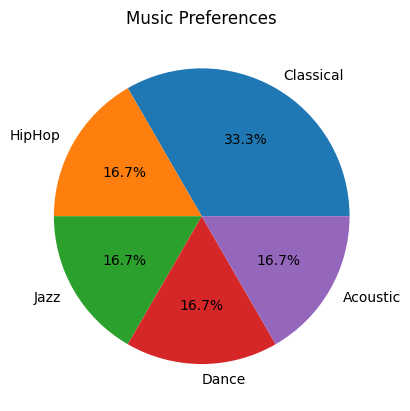

In [61]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title("Music Preferences")
plt.show()


#Splitting IN and OUT

In [ ]:
X=df.drop(columns=['genre'])
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [ ]:
Y=df['genre']
Y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

#Importing Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Fitting Model

In [ ]:
model=DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier()

#Prediction

In [ ]:
prediction=model.predict([[21,1],[29,0]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['HipHop', 'Acoustic'], dtype=object)

#Model Generation with Train and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(X_train,Y_train)
prediction2=model.predict(X_test)

#Testing Accuracy of Model

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,prediction2)
score

1.0

#Using Pickle for Persistent Model Use

In [ ]:
import pickle as pkl
with open('music.pkl','wb') as file:
  pkl.dump(model,file)

#Prediction using Saved Model File

In [ ]:
with open('music.pkl','rb') as file:
  load_model=pkl.load(file)

In [ ]:
prediction3=load_model.predict([[29,0]])
prediction3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Acoustic'], dtype=object)

#Creating a visualization of tree in Graph Description Language

In [ ]:
from sklearn import tree
tree.export_graphviz(model,out_file='music.dot',
                    feature_names=['age','gender'],
                    class_names=sorted(Y.unique()),
                    label='all',
                    rounded=True,
                    filled=True)

#Uploading tree description file to Gdrive

In [ ]:
from google.colab import files
files.upload()

Saving music.dot to music (1).dot


{'music (1).dot': b'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="age <= 30.5\\ngini = 0.778\\nsamples = 18\\nvalue = [3, 6, 3, 3, 3]\\nclass = Classical", fillcolor="#e5fad7"] ;\n1 [label="gender <= 0.5\\ngini = 0.75\\nsamples = 12\\nvalue = [3, 0, 3, 3, 3]\\nclass = Acoustic", fillcolor="#ffffff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="age <= 25.5\\ngini = 0.5\\nsamples = 6\\nvalue = [3, 0, 3, 0, 0]\\nclass = Acoustic", fillcolor="#ffffff"] ;\n1 -> 2 ;\n3 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 3, 0, 0]\\nclass = Dance", fillcolor="#39e5c5"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0, 0, 0, 0]\\nclass = Acoustic", fillcolor="#e58139"] ;\n2 -> 4 ;\n5 [label="age <= 25.5\\ngini = 0.5\\nsamples = 6\\nvalue = [0, 0, 0, 3, 3]\\nclass = HipHop", fillcolor="#ffffff"] ;\n1 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 0

In [ ]:
import shutil
shutil.move("music.dot","/content/drive/My Drive/MLData")

'/content/drive/My Drive/MLData/music.dot'

#Uploading model file to Gdrive

In [ ]:
from google.colab import files
files.upload()

Saving music.pkl to music.pkl


{'music.pkl': b'\x80\x04\x95\xff\x07\x00\x00\x00\x00\x00\x00\x8c\x15sklearn.tree._classes\x94\x8c\x16DecisionTreeClassifier\x94\x93\x94)\x81\x94}\x94(\x8c\tcriterion\x94\x8c\x04gini\x94\x8c\x08splitter\x94\x8c\x04best\x94\x8c\tmax_depth\x94N\x8c\x11min_samples_split\x94K\x02\x8c\x10min_samples_leaf\x94K\x01\x8c\x18min_weight_fraction_leaf\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cmax_features\x94N\x8c\x0emax_leaf_nodes\x94N\x8c\x0crandom_state\x94N\x8c\x15min_impurity_decrease\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x0cclass_weight\x94N\x8c\tccp_alpha\x94G\x00\x00\x00\x00\x00\x00\x00\x00\x8c\x11feature_names_in_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x02\x85\x94h\x17\x8c\x05dtype\x94\x93\x94\x8c\x02O8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?t\x94b\x89]\x94(\x8c\x03age\x94\x8c\x06gender\x94et\x94b\x8c\x0en_features_in_\x94K\x02

In [ ]:
import shutil
shutil.move("music.pkl","/content/drive/My Drive/MLData")

'/content/drive/My Drive/MLData/music.pkl'